# Finger 1 - Punto 1

## Seteo inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

import warnings 
warnings.filterwarnings('ignore')

In [6]:
auctions = pd.read_csv('./Data/auctions.csv.gzip', compression = 'gzip')

In [50]:
auctions.dtypes

auction_type_id    float64
country              int64
date                object
device_id            int64
platform             int64
ref_type_id          int64
source_id            int64
dtype: object

## Transformo fechas a formato date

In [52]:
auctions.loc[:,'date'] = pd.to_datetime(auctions['date'], errors='coerce')

In [53]:
auctions.dtypes

auction_type_id           float64
country                     int64
date               datetime64[ns]
device_id                   int64
platform                    int64
ref_type_id                 int64
source_id                   int64
dtype: object

In [7]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


## Busco los primeros 5 devices, contando la cantidad de valores en su columna.

In [115]:
grouped_device_ids_count = auctions.groupby('device_id').agg({'device_id':['count']})
grouped_device_ids_count.columns = ['device_id_count']
grouped_device_ids_count.head()

,device_id_count
device_id,
113858820194433,48
148049712234927,4
163367509015039,36
250378692954397,14
356084629798952,4


In [114]:
devices_most_participation = grouped_device_ids_count.sort_values(by='device_id_count', ascending=False).head()
first_devices = devices_most_participation.index.values
first_devices

array([ 633139769114048761, 7202276635029175071, 7298861376107043945,
       6302840482782120473, 5376802567578262905])

In [116]:
first_five_devices_rows = auctions.loc[np.isin(auctions['device_id'], first_devices), :]
first_five_devices_rows.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
12655,NaN,6333597102633388268,2019-03-12 03:02:37.264242,7298861376107043945,1,1,0
12857,NaN,6333597102633388268,2019-03-12 03:40:56.976592,7298861376107043945,1,1,0
12890,NaN,6333597102633388268,2019-03-12 03:41:40.257843,7298861376107043945,1,1,0
12940,NaN,6333597102633388268,2019-03-12 03:43:01.529164,7298861376107043945,1,1,0
13109,NaN,6333597102633388268,2019-03-12 03:49:58.483260,633139769114048761,1,1,0


In [63]:
first_five_devices_rows['device_id'].value_counts()

633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
Name: device_id, dtype: int64

## Agrupo por dia para ver evolucion en el tiempo

In [64]:
first_five_devices_rows['just_date'] = first_five_devices_rows['date'].dt.date

In [76]:
grouped_by_date_devices = first_five_devices_rows.groupby([ 'device_id', 'just_date']).agg({'just_date':['count']})

In [77]:
grouped_by_date_devices.head()

just_date
                                  count
device_id          just_date           
633139769114048761 2019-03-05      2255
                   2019-03-06       224
                   2019-03-07      1877
                   2019-03-08      1865
                   2019-03-09      2054

In [80]:
grouped_by_date_devices.columns = [ 'date_count']

In [83]:
grouped_by_date_devices = grouped_by_date_devices.stack().reset_index()

In [84]:
grouped_by_date_devices.head()

,device_id,just_date,level_2,0
0,633139769114048761,2019-03-05,date_count,2255
1,633139769114048761,2019-03-06,date_count,224
2,633139769114048761,2019-03-07,date_count,1877
3,633139769114048761,2019-03-08,date_count,1865
4,633139769114048761,2019-03-09,date_count,2054


In [88]:
grouped_by_date_devices = grouped_by_date_devices.drop(columns=['level_2'])

In [90]:
grouped_by_date_devices.columns = ['device_id', 'date', 'count_per_date']

In [91]:
grouped_by_date_devices.head()

,device_id,date,count_per_date
0,633139769114048761,2019-03-05,2255
1,633139769114048761,2019-03-06,224
2,633139769114048761,2019-03-07,1877
3,633139769114048761,2019-03-08,1865
4,633139769114048761,2019-03-09,2054


In [104]:
grouped_by_date_devices.set_index('device_id').groupby('device_id')

In [107]:
pivot_grouped_by_date_devices = grouped_by_date_devices.pivot(index='date', columns='device_id', values='count_per_date')
pivot_grouped_by_date_devices

device_id,633139769114048761,5376802567578262905,6302840482782120473,7202276635029175071,7298861376107043945
date,,,,,
2019-03-05,2255,122,4,875,640
2019-03-06,224,121,28,512,1251
2019-03-07,1877,1053,2191,2933,1316
2019-03-08,1865,2227,2233,2949,1903
2019-03-09,2054,1942,2798,2676,1952
2019-03-10,5777,3315,3623,3414,1459
2019-03-11,4829,2272,792,3157,3345
2019-03-12,4625,1902,1689,2217,2757
2019-03-13,4256,3413,3042,4322,3565


In [124]:
pivot_grouped_by_date_devices.index.name = 'Fecha'
pivot_grouped_by_date_devices.columns.name = 'Dispositivos'

# Evolución en el tiempo de la cantidad de subastas

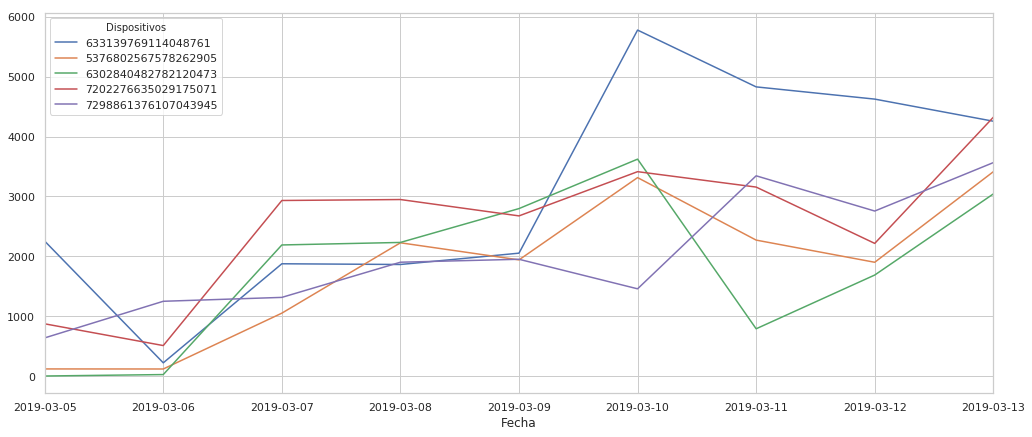

In [126]:
pivot_grouped_by_date_devices.plot(figsize=(17,7));